In [22]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [23]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [24]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [39]:
X_test.shape, X_test.dtype

((10000, 28, 28), dtype('float64'))

In [25]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

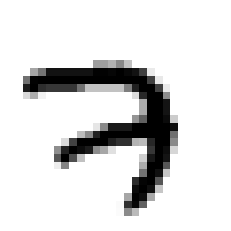

In [26]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [27]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [28]:
X_valid.shape, X_test.shape

((5000, 28, 28), (10000, 28, 28))

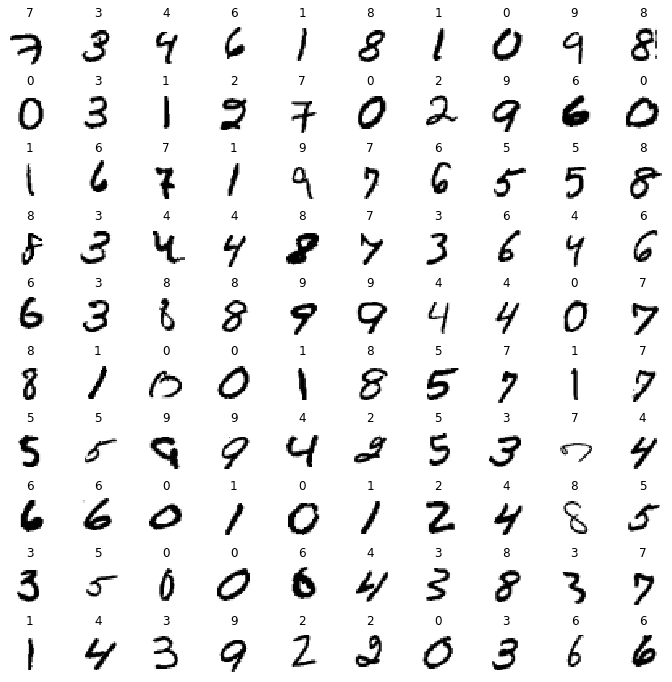

In [29]:
n_rows = 10
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [48]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [49]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

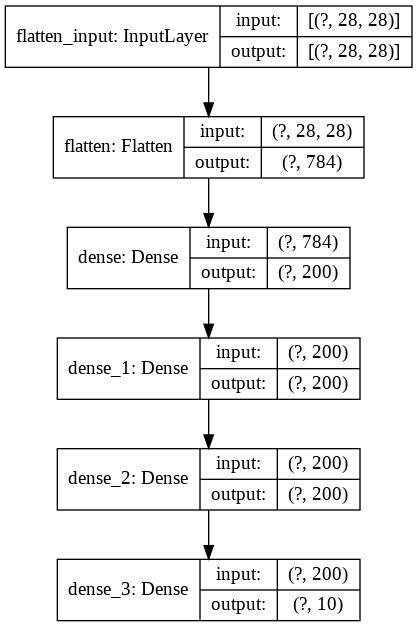

In [60]:
keras.utils.plot_model(model, show_shapes=True)

In [50]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=["accuracy"])

In [51]:
history = model.fit(X_train, y_train, epochs=25,
                    validation_data=(X_valid, y_valid))

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6689 - accuracy: 0.8229 - val_loss: 0.2950 - val_accuracy: 0.9180
Epoch 2/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2761 - accuracy: 0.9204 - val_loss: 0.2240 - val_accuracy: 0.9356
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2165 - accuracy: 0.9369 - val_loss: 0.1787 - val_accuracy: 0.9484
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1778 - accuracy: 0.9481 - val_loss: 0.1525 - val_accuracy: 0.9584
Epoch 5/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1510 - accuracy: 0.9561 - val_loss: 0.1396 - val_accuracy: 0.9590
Epoch 6/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1312 - accuracy: 0.9614 - val_loss: 0.1242 - val_accuracy: 0.9654
Epoch 7/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1149 - accuracy: 0.9665 - val_loss: 0.1126 - val_accuracy:

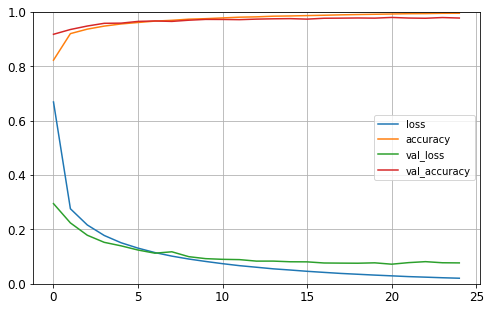

In [52]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [53]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0768 - accuracy: 0.9770


[0.07676621526479721, 0.9769999980926514]

In [58]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 965,    0,    3,    0,    1,    3,    2,    2,    2,    2],
       [   0, 1119,    3,    2,    0,    2,    2,    1,    6,    0],
       [   1,    1, 1007,    6,    2,    0,    3,    7,    5,    0],
       [   0,    0,    3,  990,    0,    8,    0,    3,    3,    3],
       [   0,    0,    5,    0,  955,    0,    1,    4,    2,   15],
       [   2,    0,    0,    4,    1,  878,    2,    1,    3,    1],
       [   4,    3,    3,    1,    5,    9,  929,    0,    4,    0],
       [   1,    4,    6,    4,    0,    0,    0, 1006,    2,    5],
       [   5,    0,    2,   10,    4,    1,    3,    3,  944,    2],
       [   4,    3,    0,    6,    4,    3,    1,    7,    4,  977]])

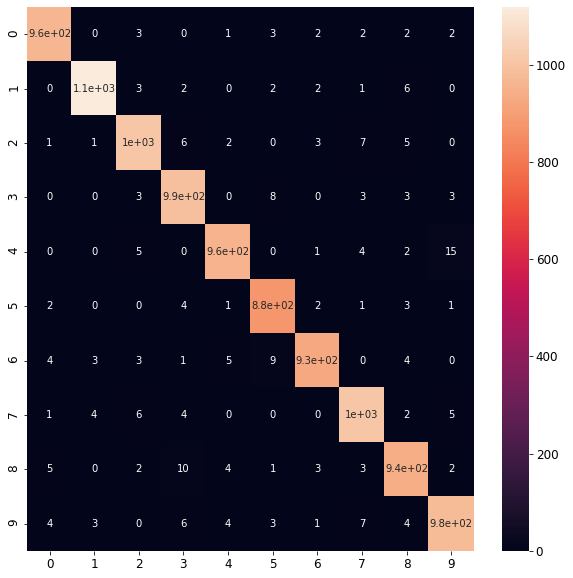

In [59]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(cm, annot=True)